In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.shape

(400, 9)

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
from sklearn.preprocessing import Binarizer

In [9]:
bi=Binarizer(threshold=0.75)

In [10]:
df['Chance of Admit ']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [11]:
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

In [12]:
df['Chance of Admit ']

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [14]:
x = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']

In [15]:
x 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [16]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [17]:
y.astype('int')

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

<Axes: xlabel='Chance of Admit ', ylabel='count'>

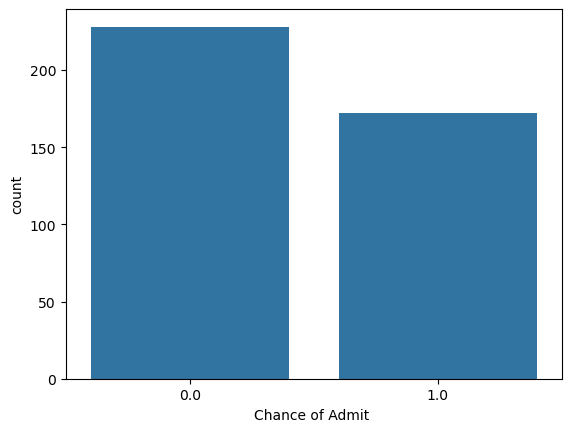

In [18]:
sns.countplot(x=y)

In [19]:
y.value_counts()

Chance of Admit 
0.0    228
1.0    172
Name: count, dtype: int64

### cross validation

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [23]:
x_train.shape

(300, 8)

In [24]:
x_test.shape

(100, 8)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc = DecisionTreeClassifier(random_state=1)

In [27]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [28]:
y_pred = dtc.predict(x_test)

In [29]:
result=pd.DataFrame({'actual':y_test,'predicted':y_train})

In [30]:
result

,actual,predicted
0,NaN,1.0
1,1.0,NaN
2,NaN,0.0
3,NaN,1.0
4,0.0,NaN
...,...,...
395,1.0,NaN
396,NaN,1.0
397,NaN,1.0
398,NaN,0.0


In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

NameError: name 'plt' is not defined

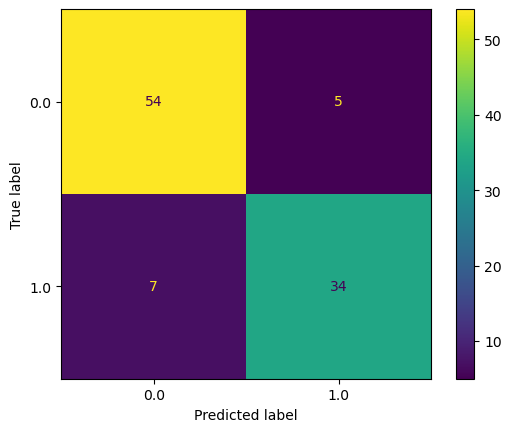

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Decision Tree')
plt.show()

In [35]:
accuracy_score(y_test,y_pred)

0.88

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90        59
         1.0       0.87      0.83      0.85        41

    accuracy                           0.88       100
   macro avg       0.88      0.87      0.88       100
weighted avg       0.88      0.88      0.88       100



In [39]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [41]:
a=[[310,308,110,4,3.5,3.0,8.60,0]]

In [43]:
dtc.predict(a)[0]

C:\Users\Sonali\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.0

In [45]:
from sklearn.tree import plot_tree

[Text(0.565625, 0.95, 'x[6] <= 8.655\ngini = 0.492\nsamples = 300\nvalue = [169, 131]'),
 Text(0.365625, 0.85, 'x[5] <= 4.25\ngini = 0.14\nsamples = 159\nvalue = [147, 12]'),
 Text(0.25625, 0.75, 'x[1] <= 319.5\ngini = 0.089\nsamples = 150\nvalue = [143, 7]'),
 Text(0.1625, 0.65, 'x[4] <= 4.75\ngini = 0.056\nsamples = 138\nvalue = [134, 4]'),
 Text(0.1, 0.55, 'x[6] <= 8.51\ngini = 0.043\nsamples = 135\nvalue = [132, 3]'),
 Text(0.05, 0.45, 'x[4] <= 3.25\ngini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.025, 0.35, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(0.075, 0.35, 'x[1] <= 310.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.05, 0.25, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.1, 0.25, 'x[1] <= 311.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.075, 0.15, 'x[0] <= 132.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05, 0.05, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1, 0.05, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),


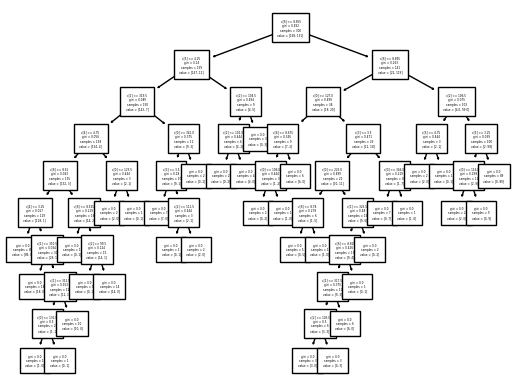

In [49]:
plot_tree(dtc,fontsize=2)